In [1]:
import numpy as np
import pandas as pd
import math

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import datasets
from sklearn import metrics
from sklearn.feature_selection import SelectFromModel
%matplotlib inline

### Single Beads

In [2]:
data = pd.read_csv("Python_StackedBeads.csv", sep = ",") 
display(data)

,Parent Sample Name,Summary: Ending O2 ppm,Summary: Laser Power (W),Summary: Robot Travel Speed (mm/s),Summary: Starting O2 ppm,Summary: Wire Feed Speed (mm/s),Summary: Wire Power (kW),Weld Ignition Stage Data: Laser Pre-Time (s),Weld Ignition Stage Data: Wire Power (kW),Weld Fill Stage Data: Fill Time (s),...,Height of Transient Region (mm),Number of Beads in Transient Region,Height of Characteristic Region (mm),Number of Layer Bands in Characteristic Region,Number of Beads in Characteristic Region,Total Number of Beads,Area of Transient Region (mm^2),Area of Characteristic Region (mm^2),MeanSpacing,SDSpacing
0,N00014-002-004,28,3000,3.50,34,50.00,0.60,0.2,0.3,0.15,...,11.827,3.0,11.989,5.0,4.0,6.0,83.609,82.890,2.947,0.285
1,N00014-002-005,24,3000,15.00,30,30.00,0.30,0.2,0.3,0.15,...,3.677,2.0,0.578,2.0,2.0,4.0,10.515,3.842,0.622,NaN
2,N00014-002-009,21,6000,3.50,26,45.00,0.30,0.2,0.3,0.15,...,13.761,4.0,6.672,7.0,5.0,8.0,155.334,70.244,1.429,0.284
3,N00014-002-030,10,3000,2.00,25,16.98,0.00,0.5,0.0,0.15,...,12.535,5.0,17.421,13.0,11.0,15.0,144.836,105.406,1.498,0.182
4,N00014-002-031,11,3000,3.50,11,18.46,0.00,0.5,0.0,0.15,...,10.218,5.0,12.530,13.0,11.0,15.0,67.428,84.557,1.122,0.172
5,N00014-002-032,13,3000,5.00,18,19.09,0.00,0.5,0.0,0.15,...,9.783,4.0,9.584,12.0,10.0,13.0,53.946,56.090,0.954,0.112
6,N00014-002-033,14,3000,7.50,18,19.44,0.00,0.5,0.0,0.15,...,6.683,4.0,9.244,11.0,11.0,15.0,28.883,46.159,0.949,0.665
7,N00014-002-034,17,6000,5.00,22,45.87,0.20,0.2,0.0,0.10,...,15.086,4.0,11.911,11.0,6.0,10.0,155.678,112.421,1.360,0.960
8,N00014-002-035,23,6000,5.00,29,55.05,0.20,0.2,0.0,0.10,...,15.741,NaN,15.905,13.0,NaN,NaN,NaN,NaN,1.384,0.128
9,N00014-002-036,32,6000,10.00,-29,47.98,0.20,0.2,0.0,0.10,...,8.220,4.0,3.543,6.0,5.0,8.0,NaN,NaN,0.875,0.123


In [3]:
# % of NaNs
data.isnull().sum()/len(data)

Parent Sample Name                                                0.0000
Summary: Ending O2 ppm                                            0.0000
Summary: Laser Power (W)                                          0.0000
Summary: Robot Travel Speed (mm/s)                                0.0000
Summary: Starting O2 ppm                                          0.0000
Summary: Wire Feed Speed (mm/s)                                   0.0000
Summary: Wire Power (kW)                                          0.0000
Weld Ignition Stage Data: Laser Pre-Time (s)                      0.0000
Weld Ignition Stage Data: Wire Power (kW)                         0.0000
Weld Fill Stage Data: Fill Time (s)                               0.0000
Weld Fill Stage Data: Heat Wirefeed Speed (mm/s)                  0.0000
Weld Fill Stage Data: Wire Power (kW)                             0.0000
Weld End Stage Data: Heat Wirefeed Speed (mm/s)                   0.0000
Bead quality (1-intermittent, 2-variable, 3-rippled

### Removing Redundant Columns

One thing that makes this harder to interpret is that there seem to be some variables with very similar meanings. Let's try to remove redundent features.

In [4]:
# removing sample names
# subdata = data.loc[:, 'Summary: Ending O2 ppm':'Weld End Stage Data: Heat Wirefeed Speed (mm/s)']
data.drop("Parent Sample Name", axis=1, inplace=True)
display(data)

,Summary: Ending O2 ppm,Summary: Laser Power (W),Summary: Robot Travel Speed (mm/s),Summary: Starting O2 ppm,Summary: Wire Feed Speed (mm/s),Summary: Wire Power (kW),Weld Ignition Stage Data: Laser Pre-Time (s),Weld Ignition Stage Data: Wire Power (kW),Weld Fill Stage Data: Fill Time (s),Weld Fill Stage Data: Heat Wirefeed Speed (mm/s),...,Height of Transient Region (mm),Number of Beads in Transient Region,Height of Characteristic Region (mm),Number of Layer Bands in Characteristic Region,Number of Beads in Characteristic Region,Total Number of Beads,Area of Transient Region (mm^2),Area of Characteristic Region (mm^2),MeanSpacing,SDSpacing
0,28,3000,3.50,34,50.00,0.60,0.2,0.3,0.15,10.00,...,11.827,3.0,11.989,5.0,4.0,6.0,83.609,82.890,2.947,0.285
1,24,3000,15.00,30,30.00,0.30,0.2,0.3,0.15,10.00,...,3.677,2.0,0.578,2.0,2.0,4.0,10.515,3.842,0.622,NaN
2,21,6000,3.50,26,45.00,0.30,0.2,0.3,0.15,10.00,...,13.761,4.0,6.672,7.0,5.0,8.0,155.334,70.244,1.429,0.284
3,10,3000,2.00,25,16.98,0.00,0.5,0.0,0.15,16.98,...,12.535,5.0,17.421,13.0,11.0,15.0,144.836,105.406,1.498,0.182
4,11,3000,3.50,11,18.46,0.00,0.5,0.0,0.15,18.46,...,10.218,5.0,12.530,13.0,11.0,15.0,67.428,84.557,1.122,0.172
5,13,3000,5.00,18,19.09,0.00,0.5,0.0,0.15,19.09,...,9.783,4.0,9.584,12.0,10.0,13.0,53.946,56.090,0.954,0.112
6,14,3000,7.50,18,19.44,0.00,0.5,0.0,0.15,19.44,...,6.683,4.0,9.244,11.0,11.0,15.0,28.883,46.159,0.949,0.665
7,17,6000,5.00,22,45.87,0.20,0.2,0.0,0.10,45.87,...,15.086,4.0,11.911,11.0,6.0,10.0,155.678,112.421,1.360,0.960
8,23,6000,5.00,29,55.05,0.20,0.2,0.0,0.10,55.05,...,15.741,NaN,15.905,13.0,NaN,NaN,NaN,NaN,1.384,0.128
9,32,6000,10.00,-29,47.98,0.20,0.2,0.0,0.10,47.98,...,8.220,4.0,3.543,6.0,5.0,8.0,NaN,NaN,0.875,0.123


In [5]:
data['Power / Velocity'] = (data['Summary: Laser Power (W)'] + data['Summary: Wire Power (kW)']*1000)/data['Summary: Robot Travel Speed (mm/s)']

In [6]:
import scipy
from scipy.cluster import hierarchy as hc
import matplotlib.pyplot as plt

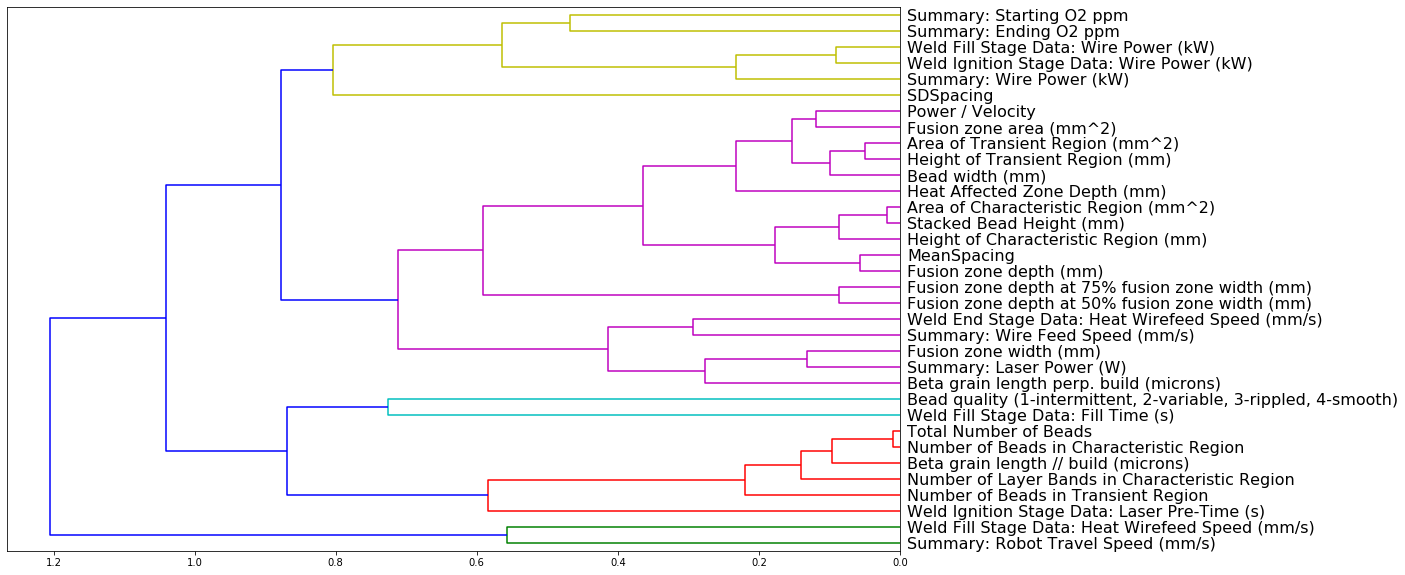

In [7]:
corr = np.round(scipy.stats.spearmanr(data, nan_policy='omit').correlation, 4)
corr_condensed = hc.distance.squareform(1-corr)
z = hc.linkage(corr_condensed, method='average')
fig = plt.figure(figsize=(16,10))
dendrogram = hc.dendrogram(z, labels=data.columns, orientation='left', leaf_font_size=16)
plt.show()

### After Cleaning Data

In [8]:
# % of NaNs
data.isnull().sum()/len(data)

Summary: Ending O2 ppm                                            0.0000
Summary: Laser Power (W)                                          0.0000
Summary: Robot Travel Speed (mm/s)                                0.0000
Summary: Starting O2 ppm                                          0.0000
Summary: Wire Feed Speed (mm/s)                                   0.0000
Summary: Wire Power (kW)                                          0.0000
Weld Ignition Stage Data: Laser Pre-Time (s)                      0.0000
Weld Ignition Stage Data: Wire Power (kW)                         0.0000
Weld Fill Stage Data: Fill Time (s)                               0.0000
Weld Fill Stage Data: Heat Wirefeed Speed (mm/s)                  0.0000
Weld Fill Stage Data: Wire Power (kW)                             0.0000
Weld End Stage Data: Heat Wirefeed Speed (mm/s)                   0.0000
Bead quality (1-intermittent, 2-variable, 3-rippled, 4-smooth)    0.0000
Bead width (mm)                                    

### Random Forest 

- We now have something we can pass to a random forest!

### Fusion Zone Area

In [ ]:
subdata = data.loc[:, 'Summary: Laser Power (W)':'Fusion zone area (mm^2)']

### Fusion Zone Width

In [ ]:
subdata = data.loc[:, 'Summary: Laser Power (W)': 'Fusion zone width (mm)']
subdata.drop("Fusion zone area (mm^2)", axis=1, inplace=True)                

### Fusion Zone Depth

In [ ]:
subdata = data.loc[:, 'Summary: Laser Power (W)': 'Fusion zone depth (mm)']
subdata.drop("Fusion zone area (mm^2)", axis=1, inplace=True)
subdata.drop("Fusion zone width (mm)", axis=1, inplace=True)

### Depth at 50% Width

In [ ]:
subdata = data.loc[:, 'Summary: Laser Power (W)': 'Fusion zone depth at 50% fusion zone width (mm)']
subdata.drop("Fusion zone area (mm^2)", axis=1, inplace=True)
subdata.drop("Fusion zone width (mm)", axis=1, inplace=True)
subdata.drop("Fusion zone depth (mm)", axis=1, inplace=True)

### Depth at 75% Width

In [ ]:
subdata = data.loc[:, 'Summary: Laser Power (W)': 'Fusion zone depth at 75% fusion zone width (mm)']
subdata.drop("Fusion zone area (mm^2)", axis=1, inplace=True)
subdata.drop("Fusion zone width (mm)", axis=1, inplace=True)
subdata.drop("Fusion zone depth (mm)", axis=1, inplace=True)
subdata.drop("Fusion zone depth at 50% fusion zone width (mm)", axis=1, inplace=True)

### Beta Grain Length // Build

In [ ]:
subdata = data.loc[:, 'Summary: Laser Power (W)': 'Beta grain length // build (microns)']
subdata.drop("Fusion zone area (mm^2)", axis=1, inplace=True)
subdata.drop("Fusion zone width (mm)", axis=1, inplace=True)
subdata.drop("Fusion zone depth (mm)", axis=1, inplace=True)
subdata.drop("Fusion zone depth at 50% fusion zone width (mm)", axis=1, inplace=True)
subdata.drop("Fusion zone depth at 75% fusion zone width (mm)", axis=1, inplace=True)

### Beta Grain Length perpendicular to Build

In [ ]:
subdata = data.loc[:, 'Summary: Laser Power (W)': 'Beta grain length perp. build (microns)']
subdata.drop("Fusion zone area (mm^2)", axis=1, inplace=True)
subdata.drop("Fusion zone width (mm)", axis=1, inplace=True)
subdata.drop("Fusion zone depth (mm)", axis=1, inplace=True)
subdata.drop("Fusion zone depth at 50% fusion zone width (mm)", axis=1, inplace=True)
subdata.drop("Fusion zone depth at 75% fusion zone width (mm)", axis=1, inplace=True)
subdata.drop("Beta grain length // build (microns)", axis=1, inplace=True)

In [ ]:
X = subdata.iloc[:, 0:11].values
y = subdata.iloc[:, 11].values

# n_jobs = -1 : use all the cores
m = RandomForestRegressor(n_jobs=-1)
%time m.fit(X, y)
m.score(X,y)

All data used for training the model

In [ ]:
# splitting the data into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
# function to calculate score for both datasets
def rmse(x,y): return math.sqrt(((x-y)**2).mean())

def print_score(m):
    res = [rmse(m.predict(X_train), y_train), rmse(m.predict(X_test), y_test),
                m.score(X_train, y_train), m.score(X_test, y_test)]
    if hasattr(m, 'oob_score_'): res.append(m.oob_score_)
    print(res)

In [ ]:
m = RandomForestRegressor(n_jobs=-1)
%time m.fit(X_train, y_train)
print_score(m)

## Reducing over-fitting

In [ ]:
# Function to calculate the depth of the tree
def dectree_max_depth(tree):
    children_left = tree.children_left
    children_right = tree.children_right

    def walk(node_id):
        if (children_left[node_id] != children_right[node_id]):
            left_max = 1 + walk(children_left[node_id])
            right_max = 1 + walk(children_right[node_id])
            return max(left_max, right_max)
        else: # leaf
            return 1

    root_node_id = 0
    return walk(root_node_id)

Let's get a baseline for this full set to compare to.

In [ ]:
m = RandomForestRegressor(n_estimators=200, n_jobs=-1, oob_score=True)
%time m.fit(X_train, y_train)
print_score(m)

In [ ]:
t=m.estimators_[0].tree_

In [ ]:
dectree_max_depth(t)

### Minimum samples in a leaf node

In [ ]:
m = RandomForestRegressor(n_estimators=1000, min_samples_leaf=5, n_jobs=-1, 
                          oob_score=True)
%time m.fit(X_train, y_train)
print_score(m)

In [ ]:
t=m.estimators_[0].tree_

In [ ]:
dectree_max_depth(t)

### Max features at a node

In [ ]:
m = RandomForestRegressor(n_estimators=1000, min_samples_leaf=4, 
                          max_features=0.3, n_jobs=-1, oob_score=True)
%time m.fit(X_train, y_train)
print_score(m)

In [ ]:
t=m.estimators_[0].tree_

In [ ]:
dectree_max_depth(t)

# Feature importance

Random shuffling of the variable 

In [ ]:
df_trn = subdata.iloc[:, 0:11]
def rf_feat_importance(m, df):
    return pd.DataFrame({'cols':df.columns, 'imp':m.feature_importances_}
                       ).sort_values('imp', ascending=False)
fi = rf_feat_importance(m, df_trn); fi[:11]

In [ ]:
fi.plot('cols', 'imp', figsize=(10,6), legend=False);

In [ ]:
def plot_fi(fi): return fi.plot('cols', 'imp', 'barh', figsize=(10,10), legend=False)
plot_fi(fi[:11]);